# Tresure Machine Learning Model Development

## External Module and Library Dependancies

In [1]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Extract data

In [2]:
!wget https://raw.githubusercontent.com/Tresure-Bangkit2023/ml-tresure/main/data/user.csv
!wget https://raw.githubusercontent.com/Tresure-Bangkit2023/ml-tresure/main/data/tourism_with_id.csv
!wget https://raw.githubusercontent.com/Tresure-Bangkit2023/ml-tresure/main/data/tourism_rating.csv

--2023-06-16 15:31:58--  https://raw.githubusercontent.com/Tresure-Bangkit2023/ml-tresure/main/data/user.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8917 (8.7K) [text/plain]
Saving to: ‘user.csv’

user.csv            100%[===================>]   8.71K  --.-KB/s    in 0s      

2023-06-16 15:31:58 (61.9 MB/s) - ‘user.csv’ saved [8917/8917]

--2023-06-16 15:31:58--  https://raw.githubusercontent.com/Tresure-Bangkit2023/ml-tresure/main/data/tourism_with_id.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 365796 (357K) [tex

In [3]:
#
# Read CSV and save as Pandas DataFrame
#
df_user             = pd.read_csv('user.csv')
df_tourism_with_id  = pd.read_csv('tourism_with_id.csv')
df_tourism_rating   = pd.read_csv('tourism_rating.csv')

## Transform data

In [4]:
# Inspect df_user DataFrame
df_user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [5]:
# Inspect df_tourism_with_id DataFrame
df_tourism_with_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [6]:
# Inspect df_tourism_rating DataFrame
df_tourism_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


### User DataFrame

In [7]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [8]:
df_user.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


This is the user DataFrame numeric values' details. We have the **average age** for user in this dataset is **28.7** ranging from 18 to 40.

### Tourism with ID DataFrame

In [9]:
df_tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [10]:
df_tourism_with_id.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


We have 10 columns with 437 non-null values. However, we have two unknown columns that have 0 value and a repeated index column respectively. We can drop those last 2 column. And we also have **Time_Minutes** column that only have 205 non-null values and we consider it's not helping in any chance.

We also want to drop the **Description**, **Coordinate**, **Lat**, and **Long** columns because they are not going to be used in the machine learning model.

In [11]:
df_tourism_with_id = df_tourism_with_id.drop(columns = ['Description',
                                                        'Time_Minutes',
                                                        'Coordinate',
                                                        'Lat',
                                                        'Long',
                                                        'Unnamed: 11',
                                                        'Unnamed: 12',])
df_tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Place_Id    437 non-null    int64  
 1   Place_Name  437 non-null    object 
 2   Category    437 non-null    object 
 3   City        437 non-null    object 
 4   Price       437 non-null    int64  
 5   Rating      437 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 20.6+ KB


Now that we have only 6 columns to be fed into the machine learning model. Let's inspect the first 5 entries.

In [12]:
df_tourism_with_id.head()

,Place_Id,Place_Name,Category,City,Price,Rating
0,1,Monumen Nasional,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5


In [13]:
df_tourism_with_id.describe()

,Place_Id,Price,Rating
count,437.000000,437.000000,437.000000
mean,219.000000,24652.173913,4.442792
std,126.295289,66446.374709,0.208587
min,1.000000,0.000000,3.400000
25%,110.000000,0.000000,4.300000
50%,219.000000,5000.000000,4.500000
75%,328.000000,20000.000000,4.600000
max,437.000000,900000.000000,5.000000


This is the tourism_with_id DataFrame numeric values' details. We have  **average price** of Rp24,652 ranging from Rp0 to Rp900,000 and **average rating** of 4.44 ranging from 3.4 to 5.0

### Tourism Rating DataFrame

In [14]:
df_tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


So, we have 3 columns and 10000 non-null entries comprising the user and the place_id with the corresponding ratings.

In [15]:
df_tourism_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [16]:
df_tourism_rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Next, normalize the ratings column using MinMax Normalization


In [17]:
df_tourism_rating['Place_Ratings'] = MinMaxScaler().fit_transform(
    np.array(df_tourism_rating['Place_Ratings']).reshape(-1,1)
)

df_tourism_rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,0.516625
std,86.137374,126.228335,0.344988
min,1.000000,1.000000,0.000000
25%,77.000000,108.750000,0.250000
50%,151.000000,220.000000,0.500000
75%,226.000000,329.000000,0.750000
max,300.000000,437.000000,1.000000


## Modeling


In [18]:
df = df_tourism_rating

# Train Test Split
X = df.drop(columns = ['Place_Ratings'])
y = df['Place_Ratings']

x_train, x_rem, y_train, y_rem = train_test_split(X, y, test_size = .3, random_state = 1)

x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size = .5, random_state = 1)

In [19]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(7000, 2)
(1500, 2)
(1500, 2)


In [20]:
# Mendapatkan jumlah user
num_users = len(df_user)
print(num_users)

# Mendapatkan jumlah places
num_places = len(df_tourism_with_id)
print(num_places)

300
437


In [21]:
class MatrixFactorization(tf.keras.Model):

    def __init__(self, num_users, num_places, embedding_size = 128, **kwargs):
        super(MatrixFactorization, self).__init__(**kwargs)

        """ Attributes """
        self.num_users = num_users + 1
        self.num_places = num_places + 1
        self.embedding_size = embedding_size
        """ End of Attributes """

        """" Model's Layers """
        # Users Embedding Layer
        self.users_embedding = tf.keras.layers.Embedding(
            input_dim = self.num_users,
            output_dim = self.embedding_size,
            name = 'users_embedding',
            embeddings_initializer = tf.keras.initializers.HeNormal(),
            embeddings_regularizer = tf.keras.regularizers.L2(1e-6),
            input_length=1
        )
        # Places Embedding Layer
        self.places_embedding = tf.keras.layers.Embedding(
            input_dim = self.num_places,
            output_dim = self.embedding_size,
            name = 'places_embedding',
            embeddings_initializer = tf.keras.initializers.HeNormal(),
            embeddings_regularizer = tf.keras.regularizers.L2(1e-6),
            input_length=1
        )
        # Flatten Layer
        self.flatten = tf.keras.layers.Flatten(name = 'flatten')
        # Multiply Layer
        self.multiply = tf.keras.layers.Multiply(name = 'multiply')
        # Add Layer
        self.add = tf.keras.layers.Add(name = 'add')
        # Output Layer
        self.out = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'out')

        """ End of Model's Layers """

    def call(self, inputs):
        users, places = tf.unstack(inputs, axis = 1)

        # Call each embedding layer respectively
        users = self.users_embedding(users)
        places = self.places_embedding(places)

        # Flatten those out
        users = self.flatten(users)
        places = self.flatten(places)

        # Multiply and merge them
        matrix = self.multiply([users, places])

        # Pass to dense output layer with sigmoid activation
        out = self.out(matrix)

        return out

In [22]:
# Hyperparameters
EMBEDDING_SIZE = 64
EPOCHS = 150
PREFERRED_LEARNING_RATE = 2e-3
LOSS = tf.keras.losses.BinaryCrossentropy()
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate = PREFERRED_LEARNING_RATE)
METRICS = [tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.TopKCategoricalAccuracy()]

In [23]:
def adjust_learning_rate(x, y):

    model = MatrixFactorization(num_users, num_places, EMBEDDING_SIZE)

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 20))

    # Select your optimizer
    optimizer = 'adam'

    # Compile the model passing in the appropriate loss
    model.compile(loss = LOSS,
                  optimizer = 'adam',
                  metrics = METRICS)

    history = model.fit(x, y, epochs=100, callbacks=[lr_schedule])

    return history

In [24]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train, y_train)

Epoch 1/100
219/219 [==============================] - 2s 2ms/step - loss: 0.6934 - mean_squared_error: 0.1200 - top_k_categorical_accuracy: 1.0000 - lr: 1.0000e-06
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6934 - mean_squared_error: 0.1200 - top_k_categorical_accuracy: 1.0000 - lr: 1.1220e-06
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6934 - mean_squared_error: 0.1200 - top_k_categorical_accuracy: 1.0000 - lr: 1.2589e-06
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6934 - mean_squared_error: 0.1200 - top_k_categorical_accuracy: 1.0000 - lr: 1.4125e-06
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6934 - mean_squared_error: 0.1200 - top_k_categorical_accuracy: 1.0000 - lr: 1.5849e-06
Epoch 6/100
219/219 [==============================] - 1s 6ms/step - loss: 0.6934 - mean_squared_error: 0.1200 - top_k_categorical_accuracy: 1.0000 - lr: 1.7783e-06
Epoch 7/10

(1e-06, 10.0, 0.0, 10.0)

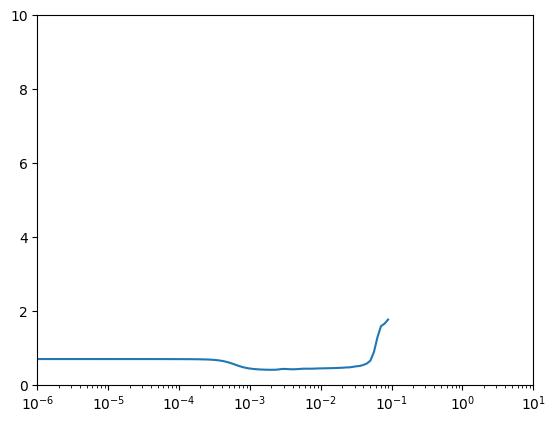

In [25]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-6, 10, 0, 10])

In [26]:
# Model Init
model = MatrixFactorization(num_users, num_places, EMBEDDING_SIZE)

# Compile the model with appropriate loss and optimizer
model.compile(loss = LOSS, optimizer = OPTIMIZER, metrics = METRICS)
model.build(input_shape = (None, 2,))
model.summary()

Model: "matrix_factorization_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 users_embedding (Embedding)  multiple                 19264     
                                                                 
 places_embedding (Embedding  multiple                 28032     
 )                                                               
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 multiply (Multiply)         multiple                  0         
                                                                 
 add (Add)                   multiple                  0 (unused)
                                                                 
 out (Dense)                 multiple                  65        
                                            

In [27]:
history = model.fit(
    x_train,
    y_train,
    epochs = EPOCHS,
    validation_data = (x_val, y_val)
)

Epoch 1/150
219/219 [==============================] - 2s 4ms/step - loss: 0.6932 - mean_squared_error: 0.1671 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6927 - val_mean_squared_error: 0.1153 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/150
219/219 [==============================] - 1s 3ms/step - loss: 0.6862 - mean_squared_error: 0.1164 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6931 - val_mean_squared_error: 0.1153 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/150
219/219 [==============================] - 1s 2ms/step - loss: 0.6313 - mean_squared_error: 0.0891 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7030 - val_mean_squared_error: 0.1197 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/150
219/219 [==============================] - 1s 2ms/step - loss: 0.5103 - mean_squared_error: 0.0350 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7379 - val_mean_squared_error: 0.1336 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/150
219/219 [===============

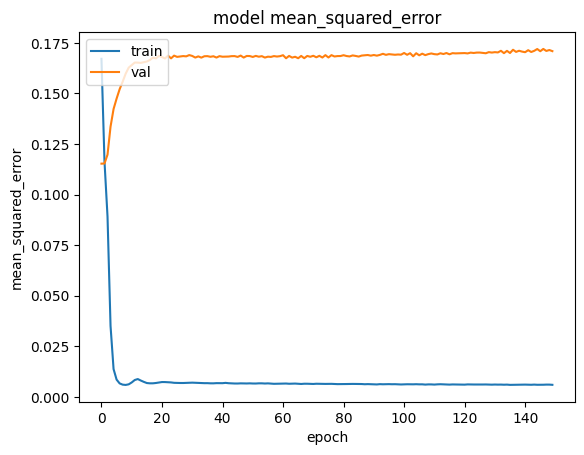

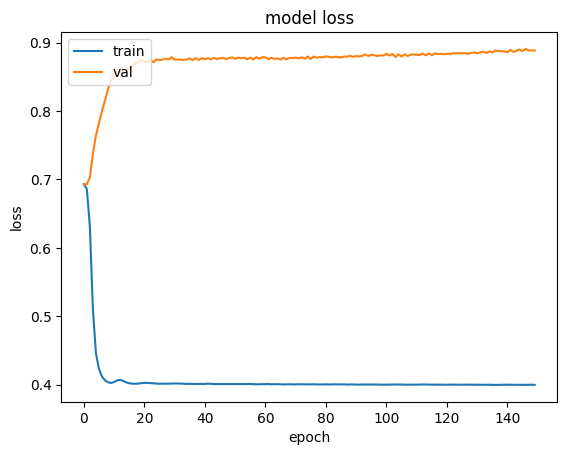

In [28]:
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Evaluation

In [29]:
model.evaluate(x_test, y_test, return_dict = True)

47/47 [==============================] - 0s 2ms/step - loss: 0.8988 - mean_squared_error: 0.1797 - top_k_categorical_accuracy: 1.0000


{'loss': 0.8988459706306458,
 'mean_squared_error': 0.1797129511833191,
 'top_k_categorical_accuracy': 1.0}

### Testing

In [30]:
# Mengambil sample user
user_id = x_test.sample(1)['User_Id'].values[0]
user_id

31

In [31]:
places_visited_by_user = df_tourism_rating[df_tourism_rating.User_Id == user_id]

places_not_visited = df_tourism_with_id[~df_tourism_with_id['Place_Id'].isin(places_visited_by_user.Place_Id.values)].Place_Id.values
places_not_visited = np.expand_dims(list(set(places_not_visited)), axis = 1)

user_places_array = np.hstack(
    ([[user_id]] * len(places_not_visited), places_not_visited)
)

In [32]:
ratings = model.predict(user_places_array).flatten()

13/13 [==============================] - 0s 1ms/step


In [33]:
top_ratings_indices = ratings.argsort()[-15:][::-1]
recommended_place_ids = [places_not_visited[i][0] for i in top_ratings_indices]

print('{}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Top 10 most rated places from the user')
print('----' * 15)

top_place_user = (
    places_visited_by_user.sort_values(
        by = ['Place_Ratings'],
        ascending=False
    )
    .head(10)
    .Place_Id.values
)

df_tourism_with_id_rows = df_tourism_with_id[df_tourism_with_id['Place_Id'].isin(top_place_user)]
for row in df_tourism_with_id_rows.itertuples():
    print(row.Place_Name, ':', row.Category)

print('')
print('----' * 15)
print('Top 7 place recommendation')
print('----' * 15)

recommended_place = df_tourism_with_id[df_tourism_with_id['Place_Id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(15)):
    print(i+1,'.',
          row.Place_Name, '\n   ',
          row.Category, ',', 'Harga Tiket Masuk ',
          row.Price, ',', 'Rating Wisata ',
          row.Rating,'\n'
         )

print('==='*15)

User 31

------------------------------------------------------------
Top 10 most rated places from the user
------------------------------------------------------------
Kawasan Kuliner BSM : Pusat Perbelanjaan
Bangsal Pagelaran : Budaya
Pantai Goa Cemara : Bahari
Pantai Parangtritis : Bahari
Pantai Watu Kodok : Bahari
The Great Asia Africa : Taman Hiburan
Panama Park 825 : Taman Hiburan
Curug Bugbrug : Cagar Alam
Sanghyang Heuleut : Cagar Alam
Hutan Pinus Kayon : Cagar Alam

------------------------------------------------------------
Top 7 place recommendation
------------------------------------------------------------
1 . Pulau Bidadari 
    Bahari , Harga Tiket Masuk  5000 , Rating Wisata  4.6 

2 . Masjid Istiqlal 
    Tempat Ibadah , Harga Tiket Masuk  0 , Rating Wisata  4.7 

3 . Pasar Tanah Abang 
    Pusat Perbelanjaan , Harga Tiket Masuk  0 , Rating Wisata  4.0 

4 . Galeri Nasional Indonesia 
    Budaya , Harga Tiket Masuk  0 , Rating Wisata  4.6 

5 . Monumen Selamat Datan

In [35]:
model.save('/kaggle/working/saved_model')
!zip keras_saved_model.zip '/kaggle/working/saved_model'

  adding: kaggle/working/saved_model/ (stored 0%)
